<a href="https://colab.research.google.com/github/MohamedFarhun/DeterminedAI-HotelBookingCancellation/blob/main/Determined_AI_Booking_Cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install determined

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.7/563.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.2/211.2 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━

In [ ]:
! git clone https://github.com/determined-ai/determined

Cloning into 'determined'...
remote: Enumerating objects: 125628, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 125628 (delta 144), reused 115 (delta 61), pack-reused 125388
Receiving objects: 100% (125628/125628), 120.52 MiB | 25.13 MiB/s, done.
Resolving deltas: 100% (96921/96921), done.
Updating files: 100% (3694/3694), done.


In [ ]:
!python -m pip install --user virtualenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 44.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
import datetime as dt
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('DeterminedHotelBookingcancellation_preprocessing.csv')
df.tail()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
29015,29016,2,2018,11,21,1,2,Meal Plan 1,0,Room_Type 1,1,0,Online,0,0,0,100.67,1,Not_Canceled
29016,29017,18,2018,4,12,0,2,Not Selected,0,Room_Type 1,2,0,Online,0,0,0,119.00,1,Not_Canceled
29017,29018,8,2017,9,29,0,3,Meal Plan 1,0,Room_Type 1,1,0,Corporate,0,0,0,65.00,0,Not_Canceled
29018,29019,20,2018,9,18,2,2,Meal Plan 1,0,Room_Type 1,1,0,Offline,0,0,0,90.00,0,Canceled
29019,29020,274,2018,7,31,2,1,Meal Plan 1,0,Room_Type 2,2,0,Online,0,0,0,96.50,1,Not_Canceled


In [ ]:
df.isna().sum()

BookingID                  0
LeadTime                   0
ArrivalYear                0
ArrivalMonth               0
ArrivalDate                0
NumWeekendNights           0
NumWeekNights              0
MealPlan                   0
Parking                    0
RoomType                   0
NumAdults                  0
NumChildren                0
MarketSegment              0
RepeatedGuest              0
NumPrevCancellations       0
NumPreviousNonCancelled    0
AvgRoomPrice               0
SpecialRequests            0
BookingStatus              0
dtype: int64

In [ ]:
df['BookingStatus'].replace(['Canceled', 'Not_Canceled'],[0, 1], inplace=True)
df['BookingID'] = df['BookingID'].apply(int)
df.head()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
0,1,10,2018,3,31,0,1,Meal Plan 1,0,Room_Type 1,1,0,Corporate,0,0,0,95.00,0,0
1,2,116,2018,2,28,2,1,Meal Plan 1,0,Room_Type 1,1,0,Online,0,0,0,61.00,0,0
2,3,11,2018,7,25,1,2,Meal Plan 1,0,Room_Type 1,2,1,Online,0,0,0,129.75,1,1
3,4,3,2017,9,12,0,1,Meal Plan 1,0,Room_Type 1,2,0,Online,0,0,0,152.00,3,1
4,5,28,2018,3,7,1,3,Meal Plan 1,0,Room_Type 1,2,0,Offline,0,0,0,87.00,0,1


In [ ]:
df['BookingStatus'].value_counts(normalize=True)

1    0.67195
0    0.32805
Name: BookingStatus, dtype: float64

In [ ]:
df.describe()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,Parking,NumAdults,NumChildren,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,14510.500000,85.276085,2017.819469,7.417333,15.589318,0.812646,2.207788,0.030772,1.846899,0.104445,0.025637,0.024673,0.159201,103.474264,0.620331,0.671950
std,8377.496742,85.886439,0.384635,3.064481,8.743740,0.873318,1.421784,0.172702,0.518475,0.402892,0.158054,0.383250,1.821987,35.052557,0.786679,0.469511
min,1.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7255.750000,17.000000,2018.000000,5.000000,8.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,80.750000,0.000000,0.000000
50%,14510.500000,57.000000,2018.000000,8.000000,16.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,99.865000,0.000000,1.000000
75%,21765.250000,127.000000,2018.000000,10.000000,23.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,120.127500,1.000000,1.000000
max,29020.000000,443.000000,2018.000000,12.000000,31.000000,7.000000,17.000000,1.000000,4.000000,10.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [ ]:
df.describe(include = 'O')

,MealPlan,RoomType,MarketSegment
count,29020,29020,29020
unique,4,7,5
top,Meal Plan 1,Room_Type 1,Online
freq,22249,22470,18593


In [ ]:
col_detail = ["BookingID : Unique number", 
              "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the df.",
              "Number of week nights (Monday to Friday) the guest stayed or booked to stay at the df.",
              "Number of adults.",
              "Number of children.",
              "Type of meal booked. Plan 1, Plan 2,Not Selected",
              "Number of car parking spaces required by the customer.",
              "RoomType:Room_Type 1 = Standard Room, Room_Type 4 = Deluxe Room, Room_Type 6 = Suite Room, Room_Type 2 = Executive Room, Room_Type 5 = Boutique Room, Room_Type 7 = Connecting Room, Room_Type 4 = Presidential Suite",
              "LeadTime:",
              "Year of arrival date.",
              "Month of arrival date.",
              "Week number of year for arrival date.",
              "Market segment designation.Online,Offline,Complementary,Corporate",
              "Value indicating if the booking name was from a repeated guest (1) or not (0).",
              "Number of previous bookings that were cancelled by the customer prior to the current booking.",
              "Number of previous bookings not cancelled by the customer prior to the current booking.",
              "AvgRoomPricing",
              "Number of special requests made by the customer (e.g. twin bed[0] or high floor[1] or single bed[3]).",
              "Booking Status:Cancelled[0],Not_cancelled[1]"]
df_descr = []
j = 0
for name in df.columns:
  df_descr.append(
      [
       name,
       df[name].dtypes,
       df[name].isnull().sum(),
       round(df[name].isnull().sum()/len(df)*100, 2),
       df[name].nunique(),
       df[name].unique(),
       col_detail[j]
       ]
       )
  j += 1

df_columns_desc = pd.DataFrame(df_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(df.columns)} columns.")

Total column of this data set is: 19 columns.


In [ ]:
df_columns_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,BookingID,int64,0,0.0,29020,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",BookingID : Unique number
1,LeadTime,int64,0,0.0,348,"[10, 116, 11, 3, 28, 213, 35, 1, 346, 79, 66, ...",Number of weekend nights (Saturday or Sunday) ...
2,ArrivalYear,int64,0,0.0,2,"[2018, 2017]",Number of week nights (Monday to Friday) the g...
3,ArrivalMonth,int64,0,0.0,12,"[3, 2, 7, 9, 6, 11, 12, 4, 10, 1, 8, 5]",Number of adults.
4,ArrivalDate,int64,0,0.0,31,"[31, 28, 25, 12, 7, 18, 9, 13, 3, 19, 6, 21, 1...",Number of children.
5,NumWeekendNights,int64,0,0.0,8,"[0, 2, 1, 4, 3, 6, 5, 7]","Type of meal booked. Plan 1, Plan 2,Not Selected"
6,NumWeekNights,int64,0,0.0,18,"[1, 2, 3, 4, 5, 8, 0, 7, 6, 14, 9, 10, 15, 11,...",Number of car parking spaces required by the c...
7,MealPlan,object,0,0.0,4,"[Meal Plan 1, Meal Plan 2, Not Selected, Meal ...","RoomType:Room_Type 1 = Standard Room, Room_Typ..."
8,Parking,int64,0,0.0,2,"[0, 1]",LeadTime:
9,RoomType,object,0,0.0,7,"[Room_Type 1, Room_Type 6, Room_Type 4, Room_T...",Year of arrival date.


In [ ]:
df['NumChildren'].value_counts()

0     26879
1      1289
2       833
3        16
9         2
10        1
Name: NumChildren, dtype: int64

In [ ]:
df['NumChildren'] = df['NumChildren'].fillna(0)
df.isna().sum()

BookingID                  0
LeadTime                   0
ArrivalYear                0
ArrivalMonth               0
ArrivalDate                0
NumWeekendNights           0
NumWeekNights              0
MealPlan                   0
Parking                    0
RoomType                   0
NumAdults                  0
NumChildren                0
MarketSegment              0
RepeatedGuest              0
NumPrevCancellations       0
NumPreviousNonCancelled    0
AvgRoomPrice               0
SpecialRequests            0
BookingStatus              0
dtype: int64

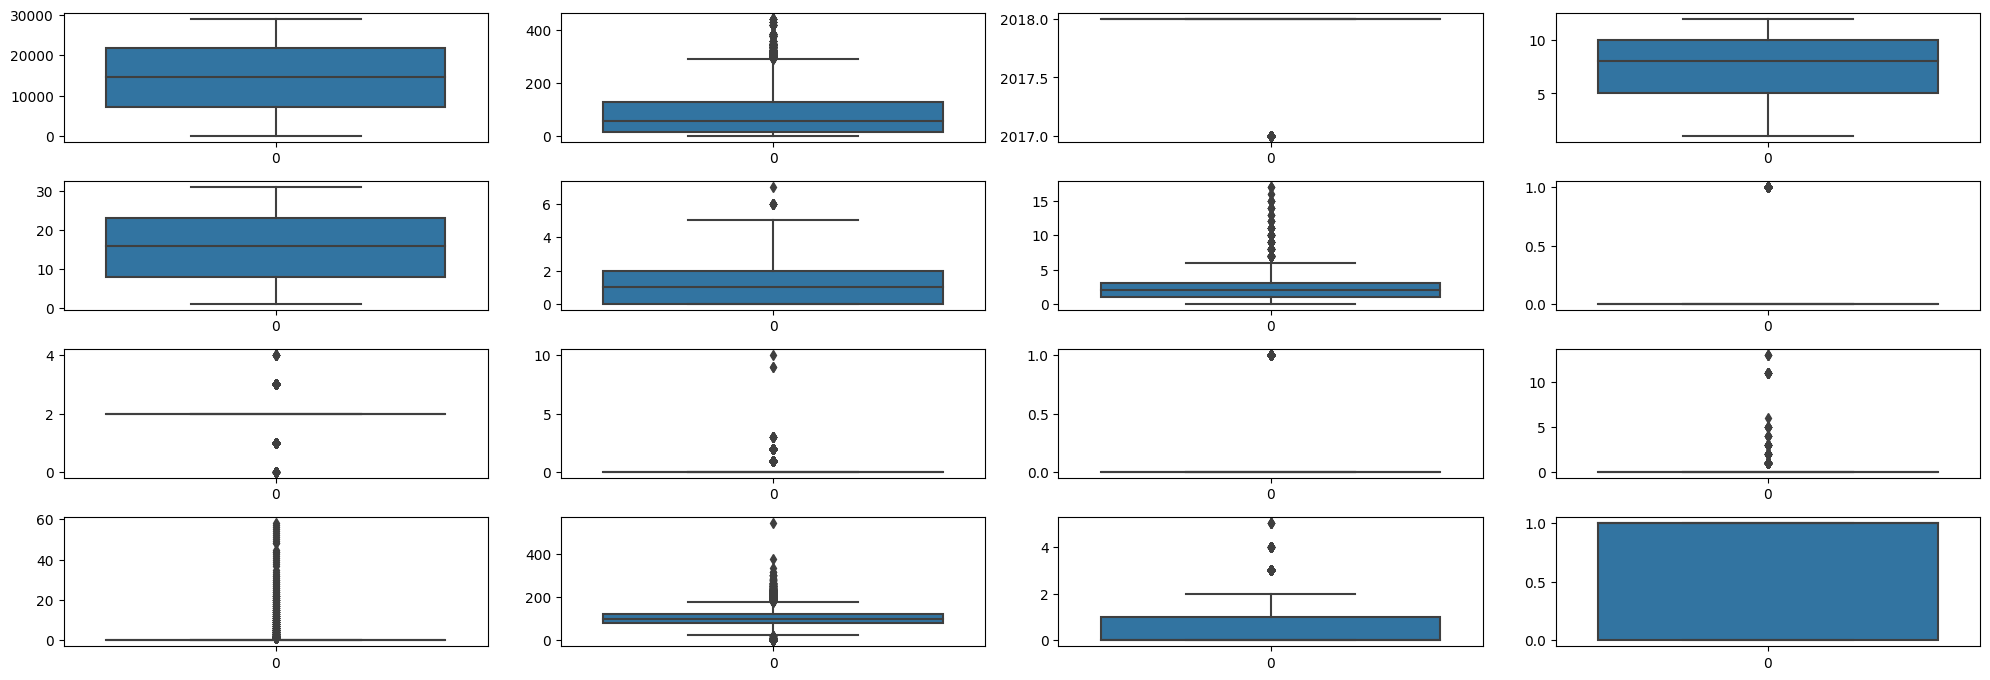

In [ ]:
plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

In [ ]:
df['MealPlan'] = df['MealPlan'].str.replace('Undefined', 'SC')
df['MealPlan'].unique()

array(['Meal Plan 1', 'Meal Plan 2', 'Not Selected', 'Meal Plan 3'],
      dtype=object)

In [ ]:
df['guests'] = df['NumAdults'] + df['NumChildren']
df.head()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus,guests
0,1,10,2018,3,31,0,1,Meal Plan 1,0,Room_Type 1,1,0,Corporate,0,0,0,95.00,0,0,1
1,2,116,2018,2,28,2,1,Meal Plan 1,0,Room_Type 1,1,0,Online,0,0,0,61.00,0,0,1
2,3,11,2018,7,25,1,2,Meal Plan 1,0,Room_Type 1,2,1,Online,0,0,0,129.75,1,1,3
3,4,3,2017,9,12,0,1,Meal Plan 1,0,Room_Type 1,2,0,Online,0,0,0,152.00,3,1,2
4,5,28,2018,3,7,1,3,Meal Plan 1,0,Room_Type 1,2,0,Offline,0,0,0,87.00,0,1,2


In [ ]:
df['arrival_date'] = df['ArrivalYear'].astype(str) + '-' + df['ArrivalMonth'].astype(str) + '-' + df['ArrivalDate'].astype(str)
df.head()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus,guests,arrival_date
0,1,10,2018,3,31,0,1,Meal Plan 1,0,Room_Type 1,1,0,Corporate,0,0,0,95.00,0,0,1,2018-3-31
1,2,116,2018,2,28,2,1,Meal Plan 1,0,Room_Type 1,1,0,Online,0,0,0,61.00,0,0,1,2018-2-28
2,3,11,2018,7,25,1,2,Meal Plan 1,0,Room_Type 1,2,1,Online,0,0,0,129.75,1,1,3,2018-7-25
3,4,3,2017,9,12,0,1,Meal Plan 1,0,Room_Type 1,2,0,Online,0,0,0,152.00,3,1,2,2017-9-12
4,5,28,2018,3,7,1,3,Meal Plan 1,0,Room_Type 1,2,0,Offline,0,0,0,87.00,0,1,2,2018-3-7


In [ ]:
df['total_stays'] = df['NumWeekendNights'] + df['NumWeekNights']
df.head()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus,guests,arrival_date,total_stays
0,1,10,2018,3,31,0,1,Meal Plan 1,0,Room_Type 1,1,0,Corporate,0,0,0,95.00,0,0,1,2018-3-31,1
1,2,116,2018,2,28,2,1,Meal Plan 1,0,Room_Type 1,1,0,Online,0,0,0,61.00,0,0,1,2018-2-28,3
2,3,11,2018,7,25,1,2,Meal Plan 1,0,Room_Type 1,2,1,Online,0,0,0,129.75,1,1,3,2018-7-25,3
3,4,3,2017,9,12,0,1,Meal Plan 1,0,Room_Type 1,2,0,Online,0,0,0,152.00,3,1,2,2017-9-12,1
4,5,28,2018,3,7,1,3,Meal Plan 1,0,Room_Type 1,2,0,Offline,0,0,0,87.00,0,1,2,2018-3-7,4


In [ ]:
df = df.drop(columns = ['NumWeekendNights', 'NumWeekNights', 'NumAdults', 'NumChildren'])
df.head()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,MealPlan,Parking,RoomType,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus,guests,arrival_date,total_stays
0,1,10,2018,3,31,Meal Plan 1,0,Room_Type 1,Corporate,0,0,0,95.00,0,0,1,2018-3-31,1
1,2,116,2018,2,28,Meal Plan 1,0,Room_Type 1,Online,0,0,0,61.00,0,0,1,2018-2-28,3
2,3,11,2018,7,25,Meal Plan 1,0,Room_Type 1,Online,0,0,0,129.75,1,1,3,2018-7-25,3
3,4,3,2017,9,12,Meal Plan 1,0,Room_Type 1,Online,0,0,0,152.00,3,1,2,2017-9-12,1
4,5,28,2018,3,7,Meal Plan 1,0,Room_Type 1,Offline,0,0,0,87.00,0,1,2,2018-3-7,4


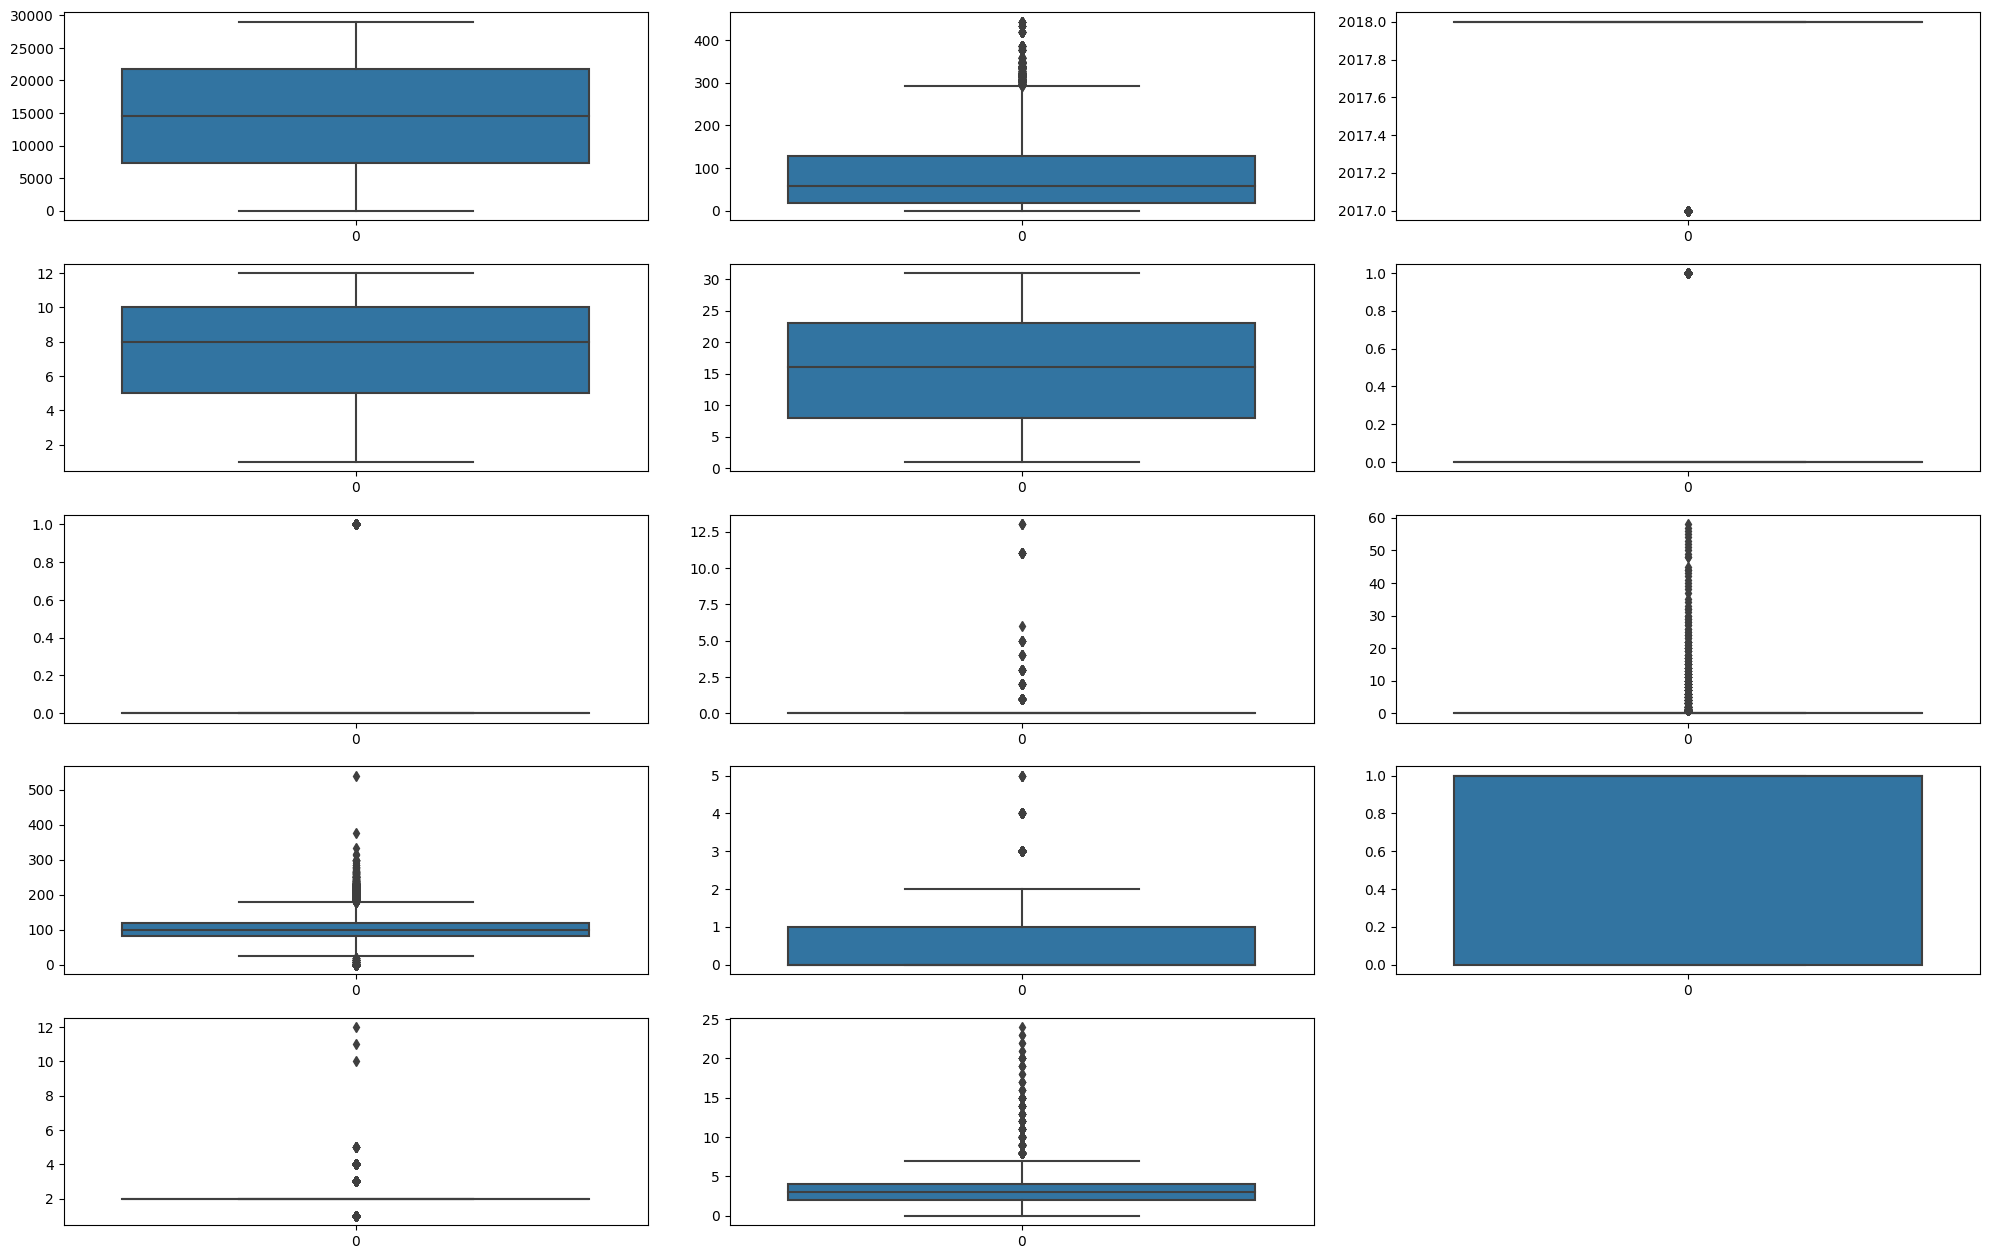

In [ ]:
plt.figure(figsize = (20, 20))
x = 1 

for column in df.describe().columns:
    plt.subplot(8,3,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

In [ ]:
df.describe(include = 'O').T

,count,unique,top,freq
MealPlan,29020,4,Meal Plan 1,22249
RoomType,29020,7,Room_Type 1,22470
MarketSegment,29020,5,Online,18593
arrival_date,29020,550,2018-10-13,198


In [ ]:
df.to_csv('DeterminedHotelBookingcancellation_exploratory.csv' ,index= False)

**Distributed training with determined AI:**-Determined automatically starts a new process for each GPU being utilised for training when performing dispersed training. Care should be made to make sure that concurrent data downloads do not interfere with one another since each process makes an attempt to download training and/or validation data. Including a distinctive identifier in the local file system path where the downloaded data is stored is one technique to achieve this.

In [ ]:
import boto3
import os
def download_data_from_s3(self):
    s3_bucket = self.context.get_data_config()["bucket"]
    download_directory = f"/tmp/data-rank{self.context.distributed.get_rank()}"
    data_file = "DeterminedHotelBookingcancellation_exploratory.csv"
    s3 = boto3.client("s3")
    os.makedirs(download_directory, exist_ok=True)
    filepath = os.path.join(download_directory, data_file)
    if not os.path.exists(filepath):
        s3.download_file(s3_bucket, data_file, filepath)
    return download_directory